In [67]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel
from google.colab.patches import cv2_imshow
import cv2
from skimage.feature import greycomatrix,greycoprops
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install unrar


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!unrar  x  gdrive/My\ Drive/DATA-FOR-ML/indic-11lang.rar

Streaming output truncated to the last 5000 lines.
Extracting  WordImageDataset_11-Languages/Urdu/Urdu_55.tif                98%  OK 
Extracting  WordImageDataset_11-Languages/Urdu/Urdu_550.tif               98%  OK 
Extracting  WordImageDataset_11-Languages/Urdu/Urdu_5500.tif              98%  OK 
Extracting  WordImageDataset_11-Languages/Urdu/Urdu_5501.tif              98%  OK 
Extracting  WordImageDataset_11-Languages/Urdu/Urdu_5502.tif              98%  OK 
Extracting  WordImageDataset_11-Languages/Urdu/Urdu_5503.tif              98%  OK 
Extracting  WordImageDataset_11-Languages/Urdu/Urdu_5504.tif              98%  OK 
Extracting  WordImageDataset_11-Languages/Urdu/Urdu_5505.tif              98%  OK 
Extracting  WordImageDataset_11-Languages/Urdu/Urdu_5506.tif              98%  OK 
Extracting  WordImageDataset_11-Languages/Urdu/Urdu_5507.tif              98%  OK 
Extracting  WordImageDataset_

In [12]:
bengali_text_images = os.listdir("indic-dev/Bengali/")
Devanagiri_text_images = os.listdir("indic-dev/Devanagiri/")
English_text_images = os.listdir("indic-dev/English/")
Gujarathi_text_images = os.listdir("indic-dev/Gujarathi/")
Kannada_text_images = os.listdir("indic-dev/Kannada/")
Malayalam_text_images = os.listdir("indic-dev/Malayalam/")
Odiya_text_images = os.listdir("indic-dev/Odiya/")
Punjabi_text_images = os.listdir("indic-dev/Punjabi/")
Tamil_text_images = os.listdir("indic-dev/Tamil/")
Telugu_text_images = os.listdir("indic-dev/Telugu/")
Urdu_text_images = os.listdir("indic-dev/Urdu/")


In [13]:
languages = os.listdir('indic-dev/')
languages 

['Gujarathi',
 'Odiya',
 'Urdu',
 'Malayalam',
 'Telugu',
 'Bengali',
 'English',
 'Punjabi',
 'Devanagiri',
 'Kannada',
 'Tamil']

In [86]:
SIZE= 32 *2

def data_to_numpy(language,text_images):
    data_images = []
    data_labels = []
   
    path = "indic-dev/{}".format(language)
    label = language
    if path:
        c = 0
        for i in text_images :
            img_path = path + '/'+ i
            c = c+1
            img = cv2.imread(img_path, 0) #Reading color images
            #print(img)
            img = cv2.resize(img, (SIZE, SIZE)) #Resize images
                
            data_images.append(img)
            data_labels.append(label)
            if c== 10000:
                break
    # changing to numpy array        

    data_images = np.array(data_images)
    data_labels = np.array(data_labels)

    return (data_images,data_labels)

In [87]:
Bengali_images,Bengali_labels= data_to_numpy('Bengali',bengali_text_images)
Devanagiri_images,Devanagiri_labels= data_to_numpy('Devanagiri',Devanagiri_text_images)
English_images,English_labels= data_to_numpy('English',English_text_images)
Gujarathi_images,Gujarathi_labels= data_to_numpy('Gujarathi',Gujarathi_text_images)
Kannada_images,Kannada_labels= data_to_numpy('Kannada',Kannada_text_images)
Odiya_images,Odiya_labels= data_to_numpy('Odiya',Odiya_text_images)
Punjabi_images,Punjabi_labels= data_to_numpy('Punjabi',Punjabi_text_images)
Tamil_images,Tamil_labels= data_to_numpy('Tamil',Tamil_text_images)
Telugu_images,Telugu_labels= data_to_numpy('Telugu',Telugu_text_images)
Urdu_images,Urdu_labels= data_to_numpy('Urdu',Urdu_text_images)

In [88]:
English_images.shape

(10000, 64, 64)

In [89]:
Urdu_images.shape

(10000, 64, 64)

In [90]:
Bengali_images.shape

(10000, 64, 64)

In [91]:
Punjabi_images.shape

(10000, 64, 64)

In [92]:
Telugu_images.shape

(10000, 64, 64)

In [93]:
Gujarathi_images.shape

(10000, 64, 64)

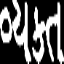

In [94]:
cv2_imshow(Gujarathi_images[2])

In [95]:

data_images = np.concatenate((Bengali_images,Devanagiri_images,English_images,Gujarathi_images,Kannada_images,Odiya_images,Punjabi_images,Tamil_images,Telugu_images,
                              Urdu_images),axis=0  )
data_labels = np.concatenate((Bengali_labels,Devanagiri_labels,English_labels,Gujarathi_labels,Kannada_labels,Odiya_labels,Punjabi_labels,Tamil_labels,Telugu_labels,
                              Urdu_labels),axis=0  )

In [96]:
X = data_images
y = data_labels

In [97]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


In [98]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [99]:
# LANGUAGES ARE ENCODED TO NUMBERS WITH LANGUAGE INDEXS

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [101]:
X_train

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  4, 255, 235, ...,   0,   0,   0],
        [ 72, 255, 240, ...,  70,  70,  70],
        [202, 255, 251, ..., 201, 201, 201],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0, 255],
        [  0,   0,   0, ...,   0,   0, 255],
        [  0,   0,   0, ...,   0,   0, 255

In [102]:
y_train 

array([6, 1, 1, ..., 4, 1, 1])

In [103]:
# NORMALIZING THE PIXELS
# Normalize pixel values to be between 0 and 1
X_train , X_test = X_train / 255.0, X_test / 255.0

In [104]:
# div the data in test and validation
# test_size is the validation size
X_test,x_val,y_test,y_val= train_test_split(X,y,test_size=.3,random_state=43)

In [105]:
y_train

array([6, 1, 1, ..., 4, 1, 1])

In [106]:
y_test

array([6, 1, 1, ..., 4, 1, 1])

In [107]:
X_train

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [108]:
len(X_test)

70000

In [109]:
len(X_train)

70000

# MODEL ACCHITECTURE

In [110]:
from tensorflow import keras
# CNN MODELING

In [111]:
def create_model():
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1),name='INPUT-CNN-LAYER' ))
  model.add(keras.layers.MaxPooling2D((2, 2),name='Pooling-layer'))
  model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',name='Conv-layer' ))
  model.add(keras.layers.MaxPooling2D((2, 2),name='2ND-POOLING-LAYER'))
  model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',name='2-CNN-LAYER-LAYER'))
  model.add(keras.layers.MaxPooling2D((2, 2),name='3ND-POOLING-LAYER'))
  model.add(keras.layers.Conv2D(32, (2, 2), activation='relu',name='3-CNN-LAYER-LAYER'))
  model.add(keras.layers.MaxPooling2D((2, 2),name='4TH-POOLING-LAYER'))
  model.add(keras.layers.Conv2D(16, (2, 2), activation='relu',name='4th-CNN-LAYER-LAYER'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(25*25,activation='tanh'))
  model.add(keras.layers.Dense(64, activation='tanh'))
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model 

In [112]:
model = create_model()


In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT-CNN-LAYER (Conv2D)    (None, 62, 62, 32)        320       
                                                                 
 Pooling-layer (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 Conv-layer (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 2ND-POOLING-LAYER (MaxPooli  (None, 14, 14, 64)       0         
 ng2D)                                                           
                                                                 
 2-CNN-LAYER-LAYER (Conv2D)  (None, 12, 12, 64)        36928     
                                                                 
 3ND-POOLING-LAYER (MaxPooli  (None, 6, 6, 64)        

In [80]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [81]:
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
DESIRED_ACCURACY = .95
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('acc') is not None and logs.get('acc') >= DESIRED_ACCURACY) :
            print('\nReached 99.9% accuracy so cancelling training!')
            self.model.stop_training = True

In [82]:
callbacks = myCallback()

In [85]:
history = model.fit(X_train, y_train, epochs=25,validation_data=(X_test, y_test)) 

Epoch 1/25
3/3 [==============================] - 1s 168ms/step - loss: 0.6102 - accuracy: 0.9000 - val_loss: 0.4635 - val_accuracy: 0.9000
Epoch 2/25
3/3 [==============================] - 0s 154ms/step - loss: 0.5665 - accuracy: 0.9429 - val_loss: 0.3202 - val_accuracy: 0.9286
Epoch 3/25
3/3 [==============================] - 0s 158ms/step - loss: 0.4987 - accuracy: 0.8857 - val_loss: 0.2498 - val_accuracy: 0.9429
Epoch 4/25
3/3 [==============================] - 0s 152ms/step - loss: 0.4146 - accuracy: 0.9429 - val_loss: 0.2416 - val_accuracy: 0.9571
Epoch 5/25
3/3 [==============================] - 0s 161ms/step - loss: 0.3252 - accuracy: 0.9857 - val_loss: 0.2845 - val_accuracy: 0.9000
Epoch 6/25
3/3 [==============================] - 0s 153ms/step - loss: 0.3275 - accuracy: 0.9286 - val_loss: 0.1937 - val_accuracy: 0.9286
Epoch 7/25
3/3 [==============================] - 0s 157ms/step - loss: 0.2282 - accuracy: 0.9714 - val_loss: 0.1547 - val_accuracy: 0.9714
Epoch 8/25
3/3 [====

In [84]:
acc = history['accuracy']
print(acc) 

TypeError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)

In [ ]:
# SAVING THE MODEL

In [7]:
model.save("indic_script_detection_model.h5")  # we can save the model and reload it at anytime in the future


NameError: ignored

In [ ]:
# Loading the model
new_model = tf.keras.models.load_model('indic_script_detection_model.h5')

In [ ]:
# Check its architecture
model.summary()

In [60]:
 X_train[5]

array([[0.        , 0.        , 0.        , ..., 0.88235294, 0.07058824,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.92941176, 0.07058824,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.07058824,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Making model predict

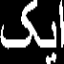

9


In [71]:
from google.colab.patches import cv2_imshow
cv2_imshow(X_train[5]*255)
print(y_train[5])

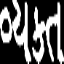

3


In [72]:
cv2_imshow(X_train[45]*255)
print(y_train[45])

ValueError: ignored

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers

In [ ]:
X_train[1].shape

# ANN APPROCH with glsm

In [ ]:
model = keras.Sequential([
      keras.layers.LSTM(units=25*25,return_sequences=True,input_shape=(25,1)),
      keras.layers.LSTM(units=25*25*25,return_sequences=True),
      #keras.layers.Flatten(),
      #keras.layers.Conv2D(25*25,activation='tahn',kernel_),
      #keras.layers.Conv2D(25*25*25,activation='relu'),
      #tf.keras.layers.ConvLSTM1D(),
      #keras.layers.Dense(125,activation='tanh'),
      #tf.keras.layers.Dropout(
      #    0.1
      #),
      keras.layers.Dense(25*25*25,activation='tanh'),
      #keras.layers.Dense(25*25*25,activation='tanh'),
      #keras.layers.Flatten(),
      #tf.keras.layers.Dropout(
      #    0.1
      #), 
    
      #keras.layers.Dense(25*25*25,activation='tanh'),
      #tf.keras.layers.Dropout(
      #    0.1
      #),
      keras.layers.Dense(25*25,activation='tanh'),
      keras.layers.Dense(10,activation='softmax')
      
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
model.fit(X_train,y_train,epochs=100)

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
# USE LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=150))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

In [ ]:
# THE BEST ACCURACY THE WE GET FROM BASE NEURAL NET  is : 0.5150
# we will now further change the neural net structure and do hyperperametertuning

In [ ]:
scores = model.evaluate(X_test, y_test)

In [ ]:
scores